# Image Processing

This program demonstrates a few of the Scikit-image library capabilities!

NumPy and Matplotlib libraries also used

In [1]:
import matplotlib.pyplot as plt
import skimage as ski

In [2]:
#Tuple of tuples to represent image names and paths
imageNames = (
    ('Link', 'Images/OcarinaOfTime.jpg'),
    ('Cyberpunk', 'Images/Cyberpunk.jpg'),
    ('NYC', 'Images/NewYork.jpg'),
    ('Fellowship', 'Images/TheFellowship.jpg')
)

images = []

#Store images in a list
for path in imageNames:
    images.append((ski.io.imread(path[1])))

# Grayscale

Takes an image and converts it to grayscale; displays before and after

In [3]:
from skimage.color import rgb2gray

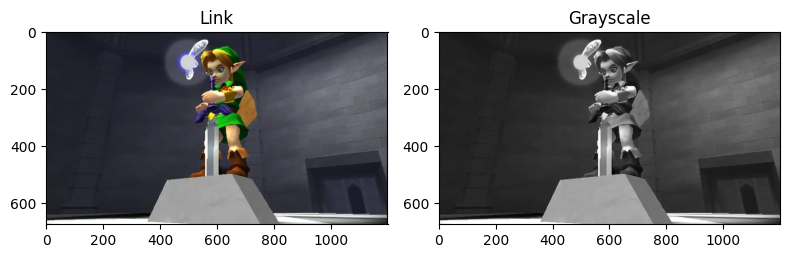

In [4]:
def gray(image, imageName):
    '''
    Takes an image and converts it to grayscale; displays before and after

    Parameters:
    image: image represented by NumPy array
    imageName: name to represent image
    '''
    grayscale = rgb2gray(image)

    fig, axes = plt.subplots(1, 2, figsize=(8,4))
    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].set_title(imageName)
    ax[1].imshow(grayscale, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")

    fig.tight_layout()
    plt.show()

#Link pulls the master sword in black and white!
gray(images[0], imageNames[0][0])

# Histogram Matching

Takes two images and matches the 1st image to the color histogram of the 2nd image

In [5]:
from skimage.exposure import match_histograms

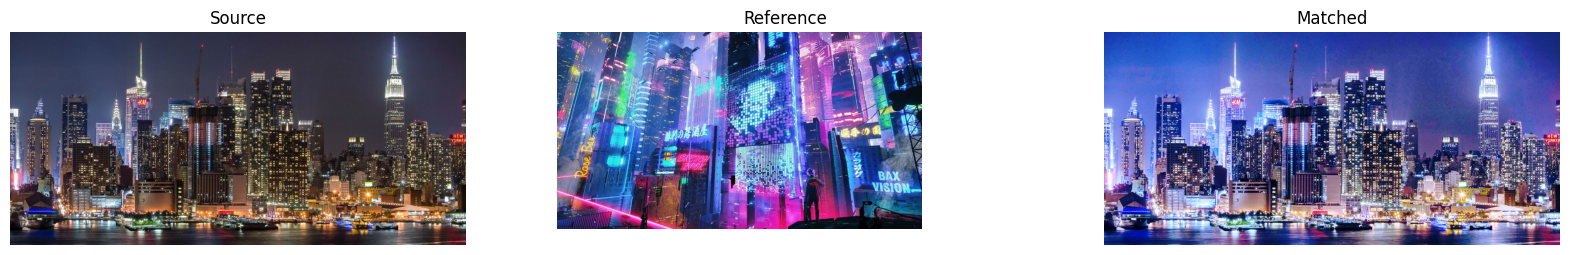

In [6]:
def histMatch(image, reference):
    '''
    Takes two images and matches the 1st image to the color histogram of the 2nd image

    Parameters:
    image: image represented by NumPy array to be altered
    reference: image represented by NumPy array to alter the other image
    '''
    matched = match_histograms(image, reference, channel_axis = -1)

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,6), sharex=True, sharey=True)

    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()

    ax1.imshow(image)
    ax1.set_title('Source')
    ax2.imshow(reference)
    ax2.set_title('Reference')
    ax3.imshow(matched)
    ax3.set_title('Matched')

    plt.tight_layout
    plt.show()

#Apply a cyberpunkesque filter to New York City!
histMatch(images[2], images[1])

# Render Text

Renders text onto any image in Impact font

In [7]:
import numpy as np

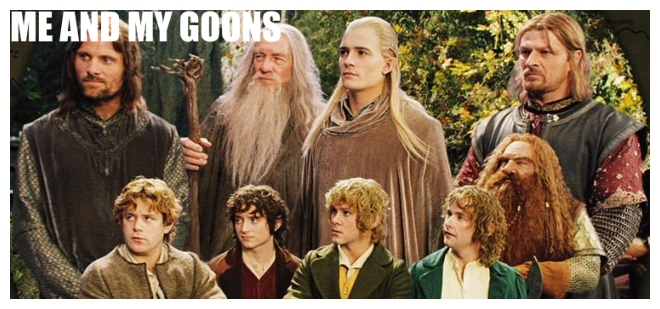

In [8]:
def ren_text(image, text):
    '''
    renders text onto an image

    Parameters:
    image: image to be represented by a NumPy array
    text: text to be applied to image
    '''
    fig = plt.figure()
    fig.figimage(image, resize=True)
    fig.text(0, 0.99, text, fontsize = 32, color = 'white', fontfamily = 'Impact', va = 'top', ha = 'left')
    fig.canvas.draw()
    annotated_image = np.asarray(fig.canvas.renderer.buffer_rgba())
    plt.close(fig)

    fig, ax = plt.subplots()
    ax.imshow(annotated_image)
    ax.set_axis_off()
    ax.set_position([0, 0, 1, 1])
    plt.show()


#Creating meme with Scikit-image and Matplotlib!
ren_text(images[3], 'ME AND MY GOONS')
